In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import mglearn as mg
import sklearn as sk
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [118]:
# load test and train data

load_test = pd.read_csv(r"C:\Users\ACER\Desktop\pyreach\to pc\churn prediction\TEST.csv")
load_train = pd.read_csv(r"C:\Users\ACER\Desktop\pyreach\to pc\churn prediction\TRAIN.csv")

In [3]:
load_test.shape, load_train.shape

((600, 15), (1401, 16))

In [4]:
load_train.head()

,Customer ID,network_age,Customer tenure in month,Total Spend in Months 1 and 2 of 2017,Total SMS Spend,Total Data Spend,Total Data Consumption,Total Unique Calls,Total Onnet spend,Total Offnet spend,Total Call centre complaint calls,Network type subscription in Month 1,Network type subscription in Month 2,Most Loved Competitor network in in Month 1,Most Loved Competitor network in in Month 2,Churn Status
0,ADF0039,123.0,4.10,76.7140,0.00,1.25,1.4951,14.0,564.0,6408.0,2.0,2G,2G,Uxaa,Mango,0.0
1,ADF0041,1316.0,43.87,98.8904,4.14,1.25,1.0244,27.0,1626.0,4373.0,1.0,2G,2G,Uxaa,Mango,0.0
2,ADF0051,2385.0,79.50,372.6300,3.51,1.25,6.0898,119.0,10411.0,22039.0,1.0,2G,2G,Weematel,Mango,0.0
3,ADF0059,1614.0,53.80,530.2000,6.85,1.25,3.3447,69.0,6822.0,6274.0,1.0,2G,2G,0,Mango,0.0
4,ADF0060,2175.0,72.50,554.1300,6.99,153.75,673204.0342,33.0,3387.0,7241.0,1.0,2G,3G,Weematel,Mango,0.0


In [5]:
load_train['Churn Status'].value_counts()

1.0    700
0.0    700
Name: Churn Status, dtype: int64

In [6]:
load_train['Most Loved Competitor network in in Month 1'].value_counts()

PQza        340
Uxaa        324
Mango       204
ToCall      202
Zintel      152
Weematel    139
0            38
Name: Most Loved Competitor network in in Month 1, dtype: int64

In [7]:
load_train['Most Loved Competitor network in in Month 2'].value_counts()

Uxaa        829
PQza        308
Mango       101
ToCall       64
Weematel     51
Zintel       46
Name: Most Loved Competitor network in in Month 2, dtype: int64

In [8]:
load_train['Network type subscription in Month 1'].value_counts()

3G       636
2G       304
Other    285
Name: Network type subscription in Month 1, dtype: int64

In [9]:
load_train['Network type subscription in Month 2'].value_counts()

3G       687
Other    285
2G       284
Name: Network type subscription in Month 2, dtype: int64

In [10]:
# mapping categorical variables load_train['Most Loved Competitor network in in month 2].values_counts()

mapped_dict = {'Uxaa':1, 'PQza':2, 'Mango':3, 'ToCall': 4, 'Weematel': 5, 'Zintel':6, '0': 0}
load_train['Most Loved Competitor network in in Month 2'] = load_train['Most Loved Competitor network in in Month 2'].map(mapped_dict)
load_train['Most Loved Competitor network in in Month 1'] = load_train['Most Loved Competitor network in in Month 1'].map(mapped_dict)

In [11]:
load_train.head()

,Customer ID,network_age,Customer tenure in month,Total Spend in Months 1 and 2 of 2017,Total SMS Spend,Total Data Spend,Total Data Consumption,Total Unique Calls,Total Onnet spend,Total Offnet spend,Total Call centre complaint calls,Network type subscription in Month 1,Network type subscription in Month 2,Most Loved Competitor network in in Month 1,Most Loved Competitor network in in Month 2,Churn Status
0,ADF0039,123.0,4.10,76.7140,0.00,1.25,1.4951,14.0,564.0,6408.0,2.0,2G,2G,1.0,3.0,0.0
1,ADF0041,1316.0,43.87,98.8904,4.14,1.25,1.0244,27.0,1626.0,4373.0,1.0,2G,2G,1.0,3.0,0.0
2,ADF0051,2385.0,79.50,372.6300,3.51,1.25,6.0898,119.0,10411.0,22039.0,1.0,2G,2G,5.0,3.0,0.0
3,ADF0059,1614.0,53.80,530.2000,6.85,1.25,3.3447,69.0,6822.0,6274.0,1.0,2G,2G,0.0,3.0,0.0
4,ADF0060,2175.0,72.50,554.1300,6.99,153.75,673204.0342,33.0,3387.0,7241.0,1.0,2G,3G,5.0,3.0,0.0


In [12]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

In [13]:
load_train.iloc[:,11:13].head(3)

,Network type subscription in Month 1,Network type subscription in Month 2
0,2G,2G
1,2G,2G
2,2G,2G


In [14]:
re_assign = pd.get_dummies(load_train[['Network type subscription in Month 1', 'Network type subscription in Month 2']])

In [15]:
re_assign.head()

,Network type subscription in Month 1_2G,Network type subscription in Month 1_3G,Network type subscription in Month 1_Other,Network type subscription in Month 2_2G,Network type subscription in Month 2_3G,Network type subscription in Month 2_Other
0,1,0,0,1,0,0
1,1,0,0,1,0,0
2,1,0,0,1,0,0
3,1,0,0,1,0,0
4,1,0,0,0,1,0


In [16]:
load_train.keys()

Index(['Customer ID', 'network_age', 'Customer tenure in month',
       'Total Spend in Months 1 and 2 of 2017', 'Total SMS Spend',
       'Total Data Spend', 'Total Data Consumption', 'Total Unique Calls',
       'Total Onnet spend ', 'Total Offnet spend',
       'Total Call centre complaint calls',
       'Network type subscription in Month 1',
       'Network type subscription in Month 2',
       'Most Loved Competitor network in in Month 1',
       'Most Loved Competitor network in in Month 2', 'Churn Status'],
      dtype='object')

In [17]:
re_assign.keys()

Index(['Network type subscription in Month 1_2G',
       'Network type subscription in Month 1_3G',
       'Network type subscription in Month 1_Other',
       'Network type subscription in Month 2_2G',
       'Network type subscription in Month 2_3G',
       'Network type subscription in Month 2_Other'],
      dtype='object')

In [18]:
new_frame = load_train
for i in re_assign.keys():
    new_frame[i] = re_assign[i]
final_frame = pd.DataFrame(new_frame)
final_frame.keys()

Index(['Customer ID', 'network_age', 'Customer tenure in month',
       'Total Spend in Months 1 and 2 of 2017', 'Total SMS Spend',
       'Total Data Spend', 'Total Data Consumption', 'Total Unique Calls',
       'Total Onnet spend ', 'Total Offnet spend',
       'Total Call centre complaint calls',
       'Network type subscription in Month 1',
       'Network type subscription in Month 2',
       'Most Loved Competitor network in in Month 1',
       'Most Loved Competitor network in in Month 2', 'Churn Status',
       'Network type subscription in Month 1_2G',
       'Network type subscription in Month 1_3G',
       'Network type subscription in Month 1_Other',
       'Network type subscription in Month 2_2G',
       'Network type subscription in Month 2_3G',
       'Network type subscription in Month 2_Other'],
      dtype='object')

In [19]:
final_frame = final_frame.drop(['Network type subscription in Month 1'], axis = 1)
final_frame = final_frame.drop(['Network type subscription in Month 2'], axis = 1)

In [20]:
final_frame.describe()

,network_age,Customer tenure in month,Total Spend in Months 1 and 2 of 2017,Total SMS Spend,Total Data Spend,Total Data Consumption,Total Unique Calls,Total Onnet spend,Total Offnet spend,Total Call centre complaint calls,Most Loved Competitor network in in Month 1,Most Loved Competitor network in in Month 2,Churn Status,Network type subscription in Month 1_2G,Network type subscription in Month 1_3G,Network type subscription in Month 1_Other,Network type subscription in Month 2_2G,Network type subscription in Month 2_3G,Network type subscription in Month 2_Other
count,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1.400000e+03,1400.000000,1400.000000,1400.00000,1400.000000,1399.000000,1399.000000,1400.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000
mean,1450.634286,48.354479,805.641729,30.394286,58.482293,2.162307e+06,202.422143,6814.392143,15730.42000,1.922143,2.881344,1.812009,0.500000,0.216988,0.453961,0.203426,0.202712,0.490364,0.203426
std,1276.008188,42.533536,1251.742068,60.885095,289.613589,6.865958e+06,302.036220,16707.784943,37448.94212,2.345515,1.709249,1.291426,0.500179,0.412341,0.498054,0.402691,0.402164,0.500086,0.402691
min,-5.000000,-0.170000,4.910000,0.000000,0.000000,5.860000e-02,1.000000,0.000000,0.00000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,287.000000,9.567500,155.537500,2.620000,1.250000,1.384346e+03,18.000000,60.000000,1123.00000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1171.000000,39.030000,606.575000,13.715000,11.250000,1.193487e+05,81.500000,1617.000000,4171.00000,1.000000,2.000000,1.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2242.000000,74.732500,1018.395500,31.205000,42.812500,1.206785e+06,254.250000,7177.750000,13151.50000,2.000000,4.000000,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,5451.000000,181.700000,24438.830000,873.980000,8295.000000,9.945640e+07,2596.000000,381174.000000,431440.00000,49.000000,6.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


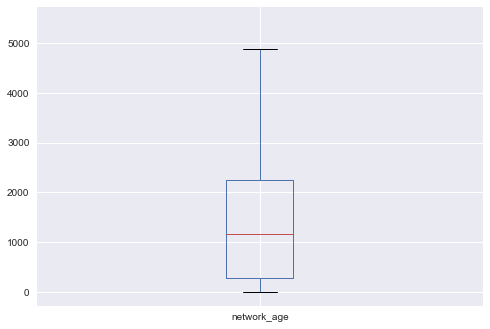

In [21]:
final_frame.boxplot(['network_age'])
plt.show()

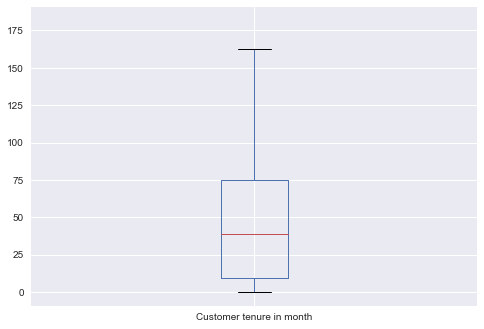

In [22]:
final_frame.boxplot(['Customer tenure in month'])
plt.show()

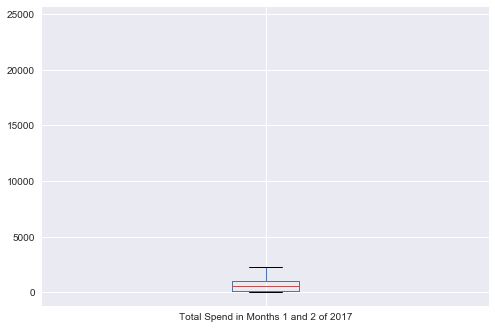

In [23]:
final_frame.boxplot(['Total Spend in Months 1 and 2 of 2017'])
plt.show()

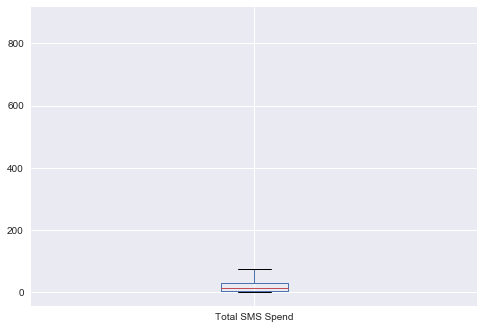

In [24]:
final_frame.boxplot(['Total SMS Spend'])
plt.show()

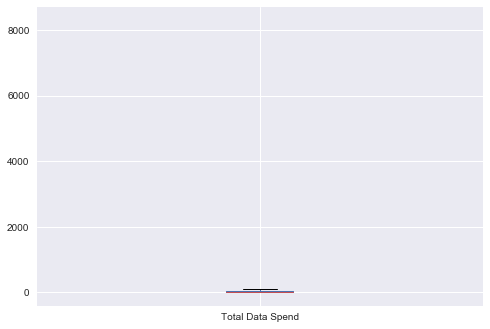

In [25]:
final_frame.boxplot(['Total Data Spend'])
plt.show()

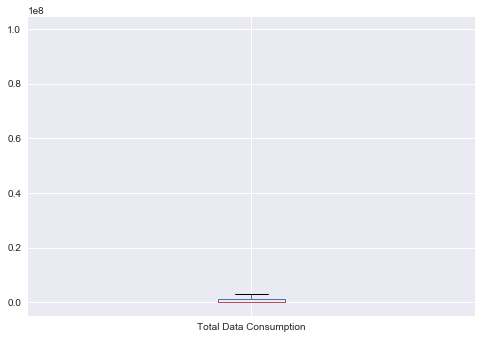

In [26]:
final_frame.boxplot(['Total Data Consumption'])
plt.show()

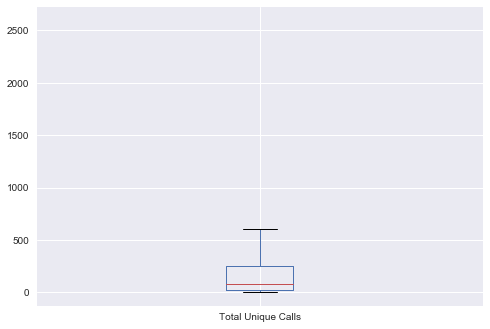

In [27]:
final_frame.boxplot(['Total Unique Calls'])
plt.show()

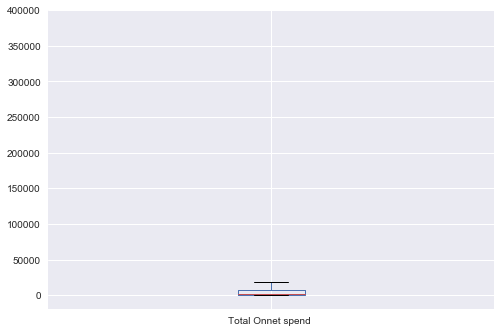

In [28]:
final_frame.boxplot(['Total Onnet spend '])
plt.show()

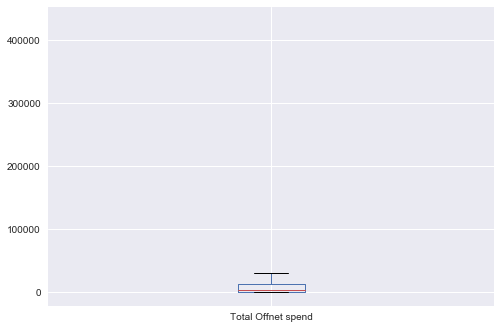

In [29]:
final_frame.boxplot(['Total Offnet spend'])
plt.show()

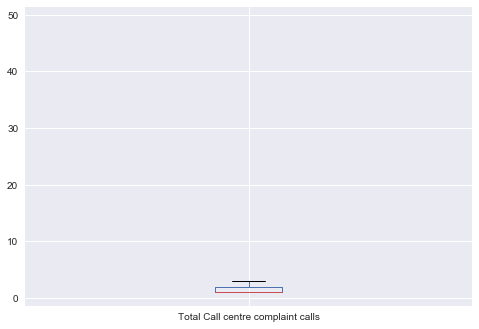

In [30]:
final_frame.boxplot(['Total Call centre complaint calls'])
plt.show()

In [31]:
final_frame.keys()

Index(['Customer ID', 'network_age', 'Customer tenure in month',
       'Total Spend in Months 1 and 2 of 2017', 'Total SMS Spend',
       'Total Data Spend', 'Total Data Consumption', 'Total Unique Calls',
       'Total Onnet spend ', 'Total Offnet spend',
       'Total Call centre complaint calls',
       'Most Loved Competitor network in in Month 1',
       'Most Loved Competitor network in in Month 2', 'Churn Status',
       'Network type subscription in Month 1_2G',
       'Network type subscription in Month 1_3G',
       'Network type subscription in Month 1_Other',
       'Network type subscription in Month 2_2G',
       'Network type subscription in Month 2_3G',
       'Network type subscription in Month 2_Other'],
      dtype='object')

In [32]:
# count outliers
np.count_nonzero(final_frame['network_age'][final_frame['network_age'] <2700])

1149

In [33]:
np.count_nonzero(final_frame['network_age'][final_frame['network_age'] >2700])

251

In [34]:
np.median(final_frame['network_age'])

nan

In [35]:
final_frame['network_age'] = final_frame['network_age'].fillna(np.median(final_frame['network_age']))
final_frame['Customer tenure in month'] = final_frame['Customer tenure in month'].fillna(np.median(final_frame['Customer tenure in month']))
final_frame['Total Spend in Months 1 and 2 of 2017'] = final_frame['Total Spend in Months 1 and 2 of 2017'].fillna(np.median(final_frame['Total Spend in Months 1 and 2 of 2017']))
final_frame['Total SMS Spend'] = final_frame['Total SMS Spend'].fillna(np.median(final_frame['Total SMS Spend']))
final_frame['Total Data Spend'] = final_frame['Total Data Spend'].fillna(np.median(final_frame['Total Data Spend']))
final_frame['Total Data Consumption'] = final_frame['Total Data Consumption'].fillna(np.median(final_frame['Total Data Consumption']))
final_frame['Total Unique Calls'] = final_frame['Total Unique Calls'].fillna(np.median(final_frame['Total Unique Calls']))
final_frame['Total Onnet spend '] = final_frame['Total Onnet spend '].fillna(np.median(final_frame['Total Onnet spend ']))
final_frame['Total Offnet spend'] = final_frame['Total Offnet spend'].fillna(np.median(final_frame['Total Offnet spend']))
final_frame['Total Call centre complaints calls'] = final_frame['Total Call centre complaint calls'].fillna(np.median(final_frame['Total Call centre complaint calls']))

In [36]:
final_frame['network_age'].dropna(axis = 0)

0        123.0
1       1316.0
2       2385.0
3       1614.0
4       2175.0
5        158.0
6        110.0
7        558.0
8        115.0
9       1868.0
10      1196.0
11       174.0
12       122.0
13       441.0
14      2132.0
15       180.0
16       114.0
17      3496.0
18       422.0
19      1914.0
20      1822.0
21       120.0
22      2372.0
23      3500.0
24       121.0
25      2417.0
26       204.0
27      3291.0
28       847.0
29      1038.0
         ...  
1370     105.0
1371    1587.0
1372     107.0
1373      99.0
1374     974.0
1375     108.0
1376    2848.0
1377    1842.0
1378    1268.0
1379    1490.0
1380     658.0
1381    4639.0
1382     266.0
1383    2630.0
1384     103.0
1385     116.0
1386    1774.0
1387    4064.0
1388    4149.0
1389    1530.0
1390    1687.0
1391    3853.0
1392    1276.0
1393    1447.0
1394     113.0
1395     136.0
1396    1795.0
1397     203.0
1398     109.0
1399     904.0
Name: network_age, Length: 1400, dtype: float64

In [37]:
final_frame.shape

(1401, 21)

In [38]:
final_frame = final_frame.dropna(axis = 0)
final_frame.shape

(1399, 21)

In [39]:
final_frame.keys()
final_frame = final_frame.drop('Total Call centre complaints calls', axis = 1)

In [40]:
check_list =list(final_frame.keys()) 
for i in check_list:
    check_list.remove(i)
    solution = i in check_list
    print (i, solution)

Customer ID False
Customer tenure in month False
Total SMS Spend False
Total Data Consumption False
Total Onnet spend  False
Total Call centre complaint calls False
Most Loved Competitor network in in Month 2 False
Network type subscription in Month 1_2G False
Network type subscription in Month 1_Other False
Network type subscription in Month 2_3G False


In [41]:
x = np.array([2,3,4,5,6,7,2,4,6,7,8,4,6,8,4,2,5,7])

In [42]:
x[x >3] = 3

In [43]:
x

array([2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3])

In [44]:
# network_age <2700, customer tenure <90, total spend in months 1 and 2 less than 1200, 
# total sms spend < 50, total_data spend <30, Total data consumption , total unique calls, total onnet spend, 
# total offnet spend, total call centre complaint calls, 

In [45]:
final_frame['network_age'].mode()

0    117.0
dtype: float64

In [46]:
final_frame['network_age'][final_frame['network_age'] > 2700] = final_frame['network_age'].mode()

In [47]:
final_frame.keys()

Index(['Customer ID', 'network_age', 'Customer tenure in month',
       'Total Spend in Months 1 and 2 of 2017', 'Total SMS Spend',
       'Total Data Spend', 'Total Data Consumption', 'Total Unique Calls',
       'Total Onnet spend ', 'Total Offnet spend',
       'Total Call centre complaint calls',
       'Most Loved Competitor network in in Month 1',
       'Most Loved Competitor network in in Month 2', 'Churn Status',
       'Network type subscription in Month 1_2G',
       'Network type subscription in Month 1_3G',
       'Network type subscription in Month 1_Other',
       'Network type subscription in Month 2_2G',
       'Network type subscription in Month 2_3G',
       'Network type subscription in Month 2_Other'],
      dtype='object')

In [48]:
final_frame['Customer tenure in month'][final_frame['Customer tenure in month'] > 90] = final_frame['Customer tenure in month'].mode()

In [49]:
final_frame['Total Spend in Months 1 and 2 of 2017'][final_frame['Total Spend in Months 1 and 2 of 2017'] > 1200] = final_frame['Total Spend in Months 1 and 2 of 2017'].mode()

In [50]:
final_frame['Total SMS Spend'][final_frame['Total SMS Spend'] > 50] = final_frame['Total SMS Spend'].mode()
final_frame['Total SMS Spend'].max()

49.880000000000003

In [51]:
final_frame['Total Data Spend'][final_frame['Total Data Spend'] > 30] = final_frame['Total Data Spend'].mode()
final_frame['Total Data Spend'].max()

30.0

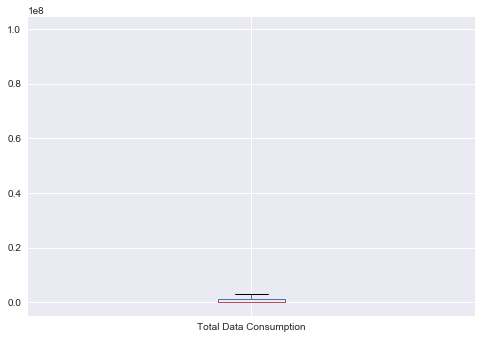

0    64.0
dtype: float64

In [52]:
final_frame.boxplot(['Total Data Consumption'])
plt.show()
final_frame['Total Data Consumption'].mode()

In [53]:
final_frame['Total Data Consumption'][final_frame['Total Data Consumption'] >final_frame['Total Data Consumption'].median()] = final_frame['Total Data Consumption'].median()

In [54]:
final_frame['Total Unique Calls'][final_frame['Total Unique Calls'] > 200] = final_frame['Total Unique Calls'].median()

In [55]:
final_frame['Total Onnet spend '][final_frame['Total Onnet spend '] > 1000] = final_frame['Total Onnet spend '].median()
final_frame['Total Offnet spend'][final_frame['Total Offnet spend'] > 13000] = final_frame['Total Offnet spend'].median()
final_frame['Total Call centre complaint calls'][final_frame['Total Call centre complaint calls'] > 2] = final_frame['Total Call centre complaint calls'].median()

In [56]:
final_frame.describe()

,network_age,Customer tenure in month,Total Spend in Months 1 and 2 of 2017,Total SMS Spend,Total Data Spend,Total Data Consumption,Total Unique Calls,Total Onnet spend,Total Offnet spend,Total Call centre complaint calls,Most Loved Competitor network in in Month 1,Most Loved Competitor network in in Month 2,Churn Status,Network type subscription in Month 1_2G,Network type subscription in Month 1_3G,Network type subscription in Month 1_Other,Network type subscription in Month 2_2G,Network type subscription in Month 2_3G,Network type subscription in Month 2_Other
count,1148.000000,1148.000000,1184.000000,1188.000000,965.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000
mean,969.246516,32.308293,494.701842,13.419419,7.137938,67983.910886,64.625447,994.173695,3655.466047,1.191565,2.881344,1.812009,0.500357,0.216583,0.454610,0.203717,0.202287,0.491065,0.203717
std,783.795630,26.126617,376.669299,13.016995,8.675471,54638.176048,48.666287,731.405823,2914.267749,0.393674,1.709249,1.291426,0.500179,0.412064,0.498114,0.402905,0.401849,0.500099,0.402905
min,-5.000000,-0.170000,4.910000,0.000000,0.000000,0.058600,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,204.000000,6.800000,133.116300,1.750000,0.000000,1375.749050,18.000000,60.000000,1125.500000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,802.500000,26.750000,458.019600,10.070000,2.500000,118434.742200,82.000000,1626.000000,4174.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1549.000000,51.632500,841.429100,21.577500,12.500000,118434.742200,82.000000,1626.000000,4174.000000,1.000000,4.000000,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,2699.000000,89.970000,1197.178400,49.880000,30.000000,118434.742200,200.000000,1626.000000,12974.000000,2.000000,6.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [57]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
from sklearn.preprocessing import StandardScaler
stdScale = StandardScaler()

In [58]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 50, penalty = 'l1',C = 0.1)
lr.get_params()

{'C': 0.1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'max_iter': 100,
 'multi_class': 'ovr',
 'n_jobs': 1,
 'penalty': 'l1',
 'random_state': 50,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [59]:
final_frame.dropna()

for i in final_frame.keys():
    if i != 'Customer ID':
        final_frame[i] = final_frame[i].replace(np.nan,final_frame[i].median())
    else:
        pass
final_frame.head()

process_frame = {}

for i in final_frame:
    if i != 'Customer ID':
        process_frame[i] = final_frame[i]
    else: 
        pass
process_frame = pd.DataFrame(process_frame)
process_frame.head()
x = {}

for i in process_frame:
    if i != 'Churn Status':
        x[i] = process_frame[i]
    else:
        pass
x = pd.DataFrame(x)
y = process_frame['Churn Status']

from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.20, random_state = 50)
x_train_scale = scale.fit_transform(x_train)
y_train_scale = scale.fit_transform(y_train)
x_test_scale = scale.fit_transform(x_test)
y_test_scale = scale.fit_transform(y_test)

x_train_std = stdScale.fit_transform(x_train)
y_train_std = stdScale.fit_transform(y_train)
x_test_std = stdScale.fit_transform(x_test)
y_test_std = stdScale.fit_transform(y_test)


x = [0.0001,0.001,0.01,0.1,1,1.0,10,100,1000]
y = []
z = []
for i in x:
    logreg = LogisticRegression(random_state = 50, penalty = 'l1', C = i)
    logreg.fit(x_train_std, y_train)
    train_score =  logreg.score(x_train_std, y_train)
    test_score = logreg.score(x_test_std, y_test)
    y.append(train_score)
    z.append(test_score)

print (x,y,z)


[0.0001, 0.001, 0.01, 0.1, 1, 1.0, 10, 100, 1000] [0.51295799821268995, 0.51295799821268995, 0.6720285969615728, 0.70330652368185875, 0.7024128686327078, 0.7024128686327078, 0.70330652368185875, 0.7024128686327078, 0.7024128686327078] [0.44642857142857145, 0.44642857142857145, 0.625, 0.67500000000000004, 0.66785714285714282, 0.66785714285714282, 0.67500000000000004, 0.67500000000000004, 0.67500000000000004]


In [60]:
from sklearn.cross_validation import train_test_split

In [61]:
final_frame.dropna()

for i in final_frame.keys():
    if i != 'Customer ID':
        final_frame[i] = final_frame[i].replace(np.nan,final_frame[i].median())
    else:
        pass
final_frame.head()

,Customer ID,network_age,Customer tenure in month,Total Spend in Months 1 and 2 of 2017,Total SMS Spend,Total Data Spend,Total Data Consumption,Total Unique Calls,Total Onnet spend,Total Offnet spend,Total Call centre complaint calls,Most Loved Competitor network in in Month 1,Most Loved Competitor network in in Month 2,Churn Status,Network type subscription in Month 1_2G,Network type subscription in Month 1_3G,Network type subscription in Month 1_Other,Network type subscription in Month 2_2G,Network type subscription in Month 2_3G,Network type subscription in Month 2_Other
0,ADF0039,123.0,4.10,76.7140,0.00,1.25,1.4951,14.0,564.0,6408.0,2.0,1.0,3.0,0.0,1,0,0,1,0,0
1,ADF0041,1316.0,43.87,98.8904,4.14,1.25,1.0244,27.0,1626.0,4373.0,1.0,1.0,3.0,0.0,1,0,0,1,0,0
2,ADF0051,2385.0,79.50,372.6300,3.51,1.25,6.0898,119.0,1626.0,4174.0,1.0,5.0,3.0,0.0,1,0,0,1,0,0
3,ADF0059,1614.0,53.80,530.2000,6.85,1.25,3.3447,69.0,1626.0,6274.0,1.0,0.0,3.0,0.0,1,0,0,1,0,0
4,ADF0060,2175.0,72.50,554.1300,6.99,2.50,118434.7422,33.0,1626.0,7241.0,1.0,5.0,3.0,0.0,1,0,0,0,1,0


In [62]:
process_frame = {}

for i in final_frame:
    if i != 'Customer ID':
        process_frame[i] = final_frame[i]
    else: 
        pass
process_frame = pd.DataFrame(process_frame)
process_frame.head()

,Churn Status,Customer tenure in month,Most Loved Competitor network in in Month 1,Most Loved Competitor network in in Month 2,Network type subscription in Month 1_2G,Network type subscription in Month 1_3G,Network type subscription in Month 1_Other,Network type subscription in Month 2_2G,Network type subscription in Month 2_3G,Network type subscription in Month 2_Other,Total Call centre complaint calls,Total Data Consumption,Total Data Spend,Total Offnet spend,Total Onnet spend,Total SMS Spend,Total Spend in Months 1 and 2 of 2017,Total Unique Calls,network_age
0,0.0,4.10,1.0,3.0,1,0,0,1,0,0,2.0,1.4951,1.25,6408.0,564.0,0.00,76.7140,14.0,123.0
1,0.0,43.87,1.0,3.0,1,0,0,1,0,0,1.0,1.0244,1.25,4373.0,1626.0,4.14,98.8904,27.0,1316.0
2,0.0,79.50,5.0,3.0,1,0,0,1,0,0,1.0,6.0898,1.25,4174.0,1626.0,3.51,372.6300,119.0,2385.0
3,0.0,53.80,0.0,3.0,1,0,0,1,0,0,1.0,3.3447,1.25,6274.0,1626.0,6.85,530.2000,69.0,1614.0
4,0.0,72.50,5.0,3.0,1,0,0,0,1,0,1.0,118434.7422,2.50,7241.0,1626.0,6.99,554.1300,33.0,2175.0


In [63]:
x = {}

for i in process_frame:
    if i != 'Churn Status':
        x[i] = process_frame[i]
    else:
        pass
x = pd.DataFrame(x)
y = process_frame['Churn Status']

In [64]:
x.shape, y.shape

((1399, 18), (1399,))

In [65]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.30, random_state = 50)

In [66]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((979, 18), (420, 18), (979,), (420,))

In [67]:
x_train_scale = scale.fit_transform(x_train)
y_train_scale = scale.fit_transform(y_train)
x_test_scale = scale.fit_transform(x_test)
y_test_scale = scale.fit_transform(y_test)

In [68]:
x_train_std = stdScale.fit_transform(x_train)
y_train_std = stdScale.fit_transform(y_train)
x_test_std = stdScale.fit_transform(x_test)
y_test_std = stdScale.fit_transform(y_test)

In [69]:
lr.fit(x_train_std, y_train)
print("Training accuracy: ", lr.score(x_train_std, y_train))
print("Test accuracy: ", lr.score(x_test_std, y_test))

Training accuracy:  0.712972420838
Test accuracy:  0.67380952381


In [70]:
lr.intercept_

array([ 0.])

In [71]:
lr.coef_

array([[ 0.        ,  0.        ,  0.34109592,  0.        ,  0.        ,
         0.05464358,  0.        ,  0.        ,  0.00240884, -0.16605379,
        -0.07990892,  0.        , -0.01914397, -0.29834352,  0.48835489,
        -0.64903756,  0.0281802 ,  0.        ]])

In [72]:
x_predict = lr.predict(x_test)
x_predict.shape

(420,)

In [99]:
from sklearn.ensemble import RandomForestClassifier
randfore = RandomForestClassifier()

In [100]:
randfore.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_split': 1e-07,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [146]:
forest = RandomForestClassifier(n_estimators = 100, random_state =50)
forest.fit(x_train_std, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=50,
            verbose=0, warm_start=False)

In [147]:
print ("accuracy on training set: %f" % forest.score(x_train_std, y_train))
print ("accuracy on test set: %f " % forest.score(x_test_std, y_test))

accuracy on training set: 1.000000
accuracy on test set: 0.728571 


In [148]:
x_predict = lr.predict(x_test_std)
x_predict.shape

(420,)

In [149]:
from sklearn.metrics import accuracy_score
accuracy_score(x_predict, y_test)

0.67380952380952386

In [106]:
from sklearn.cross_validation import cross_val_score

In [107]:
from sklearn.cross_validation import KFold
import numpy as np

crossvalidation = KFold(n = x.shape[0], n_folds = 5, shuffle = True, random_state=1)
scores = cross_val_score(forest, x,y, scoring = 'mean_squared_error', cv = crossvalidation, n_jobs = 1)

In [108]:
scores

array([-0.23214286, -0.18928571, -0.225     , -0.28214286, -0.25806452])

In [119]:
check_test = load_test

In [120]:
# mapping categorical variables load_train['Most Loved Competitor network in in month 2].values_counts()

mapped_dict = {'Uxaa':1, 'PQza':2, 'Mango':3, 'ToCall': 4, 'Weematel': 5, 'Zintel':6, '0': 0}
check_test['Most Loved Competitor network in in Month 2'] = check_test['Most Loved Competitor network in in Month 2'].map(mapped_dict)
check_test['Most Loved Competitor network in in Month 1'] = check_test['Most Loved Competitor network in in Month 1'].map(mapped_dict)

In [121]:
check_test.iloc[:,11:13].head(3)

,Network type subscription in Month 1,Network type subscription in Month 2
0,3G,3G
1,3G,3G
2,3G,3G


In [122]:
re_assign = pd.get_dummies(check_test[['Network type subscription in Month 1', 'Network type subscription in Month 2']])

In [123]:
new_frame = check_test
for i in re_assign.keys():
    new_frame[i] = re_assign[i]
final_frame = pd.DataFrame(new_frame)
final_frame.keys()

Index(['Customer ID', 'network_age', 'Customer tenure in month',
       'Total Spend in Months 1 and 2 of 2017', 'Total SMS Spend',
       'Total Data Spend', 'Total Data Consumption', 'Total Unique Calls',
       'Total Onnet spend ', 'Total Offnet spend',
       'Total Call centre complaint calls',
       'Network type subscription in Month 1',
       'Network type subscription in Month 2',
       'Most Loved Competitor network in in Month 1',
       'Most Loved Competitor network in in Month 2',
       'Network type subscription in Month 1_2G',
       'Network type subscription in Month 1_3G',
       'Network type subscription in Month 1_Other',
       'Network type subscription in Month 2_2G',
       'Network type subscription in Month 2_3G',
       'Network type subscription in Month 2_Other'],
      dtype='object')

In [124]:
final_frame = final_frame.drop(['Network type subscription in Month 1'], axis = 1)
final_frame = final_frame.drop(['Network type subscription in Month 2'], axis = 1)

In [125]:
final_frame['network_age'] = final_frame['network_age'].fillna(np.median(final_frame['network_age']))
final_frame['Customer tenure in month'] = final_frame['Customer tenure in month'].fillna(np.median(final_frame['Customer tenure in month']))
final_frame['Total Spend in Months 1 and 2 of 2017'] = final_frame['Total Spend in Months 1 and 2 of 2017'].fillna(np.median(final_frame['Total Spend in Months 1 and 2 of 2017']))
final_frame['Total SMS Spend'] = final_frame['Total SMS Spend'].fillna(np.median(final_frame['Total SMS Spend']))
final_frame['Total Data Spend'] = final_frame['Total Data Spend'].fillna(np.median(final_frame['Total Data Spend']))
final_frame['Total Data Consumption'] = final_frame['Total Data Consumption'].fillna(np.median(final_frame['Total Data Consumption']))
final_frame['Total Unique Calls'] = final_frame['Total Unique Calls'].fillna(np.median(final_frame['Total Unique Calls']))
final_frame['Total Onnet spend '] = final_frame['Total Onnet spend '].fillna(np.median(final_frame['Total Onnet spend ']))
final_frame['Total Offnet spend'] = final_frame['Total Offnet spend'].fillna(np.median(final_frame['Total Offnet spend']))
final_frame['Total Call centre complaints calls'] = final_frame['Total Call centre complaint calls'].fillna(np.median(final_frame['Total Call centre complaint calls']))

In [126]:
final_frame['network_age'] = final_frame['network_age'].dropna(axis = 0)

In [127]:
final_frame = final_frame.dropna(axis = 0)
final_frame.shape

(600, 20)

In [128]:
final_frame = final_frame.drop('Total Call centre complaints calls', axis = 1)

In [129]:
check_list =list(final_frame.keys()) 
for i in check_list:
    check_list.remove(i)
    solution = i in check_list
    print (i, solution)

Customer ID False
Customer tenure in month False
Total SMS Spend False
Total Data Consumption False
Total Onnet spend  False
Total Call centre complaint calls False
Most Loved Competitor network in in Month 2 False
Network type subscription in Month 1_3G False
Network type subscription in Month 2_2G False
Network type subscription in Month 2_Other False


In [130]:
final_frame['network_age'][final_frame['network_age'] > 2700] = final_frame['network_age'].mode()

In [131]:
final_frame['Customer tenure in month'][final_frame['Customer tenure in month'] > 90] = final_frame['Customer tenure in month'].mode()

In [132]:
final_frame['Total Spend in Months 1 and 2 of 2017'][final_frame['Total Spend in Months 1 and 2 of 2017'] > 1200] = final_frame['Total Spend in Months 1 and 2 of 2017'].mode()

In [133]:
final_frame['Total Onnet spend '][final_frame['Total Onnet spend '] > 1000] = final_frame['Total Onnet spend '].median()
final_frame['Total Offnet spend'][final_frame['Total Offnet spend'] > 13000] = final_frame['Total Offnet spend'].median()
final_frame['Total Call centre complaint calls'][final_frame['Total Call centre complaint calls'] > 2] = final_frame['Total Call centre complaint calls'].median()

In [134]:
final_frame.dropna()

for i in final_frame.keys():
    if i != 'Customer ID':
        final_frame[i] = final_frame[i].replace(np.nan,final_frame[i].median())
    else:
        pass
final_frame.head()

,Customer ID,network_age,Customer tenure in month,Total Spend in Months 1 and 2 of 2017,Total SMS Spend,Total Data Spend,Total Data Consumption,Total Unique Calls,Total Onnet spend,Total Offnet spend,Total Call centre complaint calls,Most Loved Competitor network in in Month 1,Most Loved Competitor network in in Month 2,Network type subscription in Month 1_2G,Network type subscription in Month 1_3G,Network type subscription in Month 1_Other,Network type subscription in Month 2_2G,Network type subscription in Month 2_3G,Network type subscription in Month 2_Other
0,ADF0001,1012.0,33.733333,1313.10,14.04,226.3,3.126093e+06,64,2526.5,12402.0,1,5,3,0,1,0,0,1,0
1,ADF0002,137.0,4.566667,403.45,73.63,5.0,1.628809e+02,515,2526.5,8096.5,1,4,3,0,1,0,0,1,0
2,ADF0003,202.0,6.733333,403.45,4.36,245.0,3.334607e+06,163,228.0,1495.0,1,4,3,0,1,0,0,1,0
3,ADF0004,165.0,5.500000,403.45,0.00,12.5,6.682924e+05,484,0.0,8096.5,2,1,3,0,1,0,0,1,0
4,ADF0005,759.0,25.300000,403.45,69.57,412.5,6.666975e+06,64,2526.5,8096.5,2,3,3,0,1,0,0,1,0


In [135]:
process_frame = {}

for i in final_frame:
    if i != 'Customer ID':
        process_frame[i] = final_frame[i]
    else: 
        pass
process_frame = pd.DataFrame(process_frame)
process_frame.head()

,Customer tenure in month,Most Loved Competitor network in in Month 1,Most Loved Competitor network in in Month 2,Network type subscription in Month 1_2G,Network type subscription in Month 1_3G,Network type subscription in Month 1_Other,Network type subscription in Month 2_2G,Network type subscription in Month 2_3G,Network type subscription in Month 2_Other,Total Call centre complaint calls,Total Data Consumption,Total Data Spend,Total Offnet spend,Total Onnet spend,Total SMS Spend,Total Spend in Months 1 and 2 of 2017,Total Unique Calls,network_age
0,33.733333,5,3,0,1,0,0,1,0,1,3.126093e+06,226.3,12402.0,2526.5,14.04,1313.10,64,1012.0
1,4.566667,4,3,0,1,0,0,1,0,1,1.628809e+02,5.0,8096.5,2526.5,73.63,403.45,515,137.0
2,6.733333,4,3,0,1,0,0,1,0,1,3.334607e+06,245.0,1495.0,228.0,4.36,403.45,163,202.0
3,5.500000,1,3,0,1,0,0,1,0,2,6.682924e+05,12.5,8096.5,0.0,0.00,403.45,484,165.0
4,25.300000,3,3,0,1,0,0,1,0,2,6.666975e+06,412.5,8096.5,2526.5,69.57,403.45,64,759.0


In [136]:
test_predict = lr.predict(process_frame)
test_predict.shape

(600,)

In [137]:
submit_frame = {}
for i in [1]:
    submit_frame['Churn Status'] = test_predict
    submit_frame['Customer ID'] = final_frame['Customer ID']
    
submit_frame = pd.DataFrame(submit_frame)

In [138]:
submit_frame.shape

(600, 2)

In [97]:
submit_frame.to_csv('submission1.csv')

In [139]:
submit_frame.to_csv(r"C:\Users\ACER\Desktop\pyreach\to pc\churn prediction\submission3.csv")